##**NAME :PATEL HET PRAVINBHAI**
##TASK 2: EDA ON NETFLIX SHOWS DATASET

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# What is exploratory data analysis?

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

# Why is exploratory data analysis important in data science?

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about standard deviations, categorical variables, and confidence intervals. Once EDA is complete and insights are drawn, its features can then be used for more sophisticated data analysis or modeling, including machine learning.

# Exploratory data analysis tools
## Specific statistical functions and techniques you can perform with EDA tools include:

Clustering and dimension reduction techniques, which help create graphical displays of high-dimensional data containing many variables.
Univariate visualization of each field in the raw dataset, with summary statistics.
Bivariate visualizations and summary statistics that allow you to assess the relationship between each variable in the dataset and the target variable you’re looking at.
Multivariate visualizations, for mapping and understanding interactions between different fields in the data.
K-means Clustering is a clustering method in unsupervised learning where data points are assigned into K groups, i.e. the number of clusters, based on the distance from each group’s centroid. The data points closest to a particular centroid will be clustered under the same category. K-means Clustering is commonly used in market segmentation, pattern recognition, and image compression.
Predictive models, such as linear regression, use statistics and data to predict outcomes.

## Use Library in EDA On Netflix
1. Numpy
2. Pandas
3. Matplotlib
4. Worlcloud
5. Plotly

# EDA on Netflix

In [ ]:
movies=pd.read_csv("/content/netflix_titles.csv")
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
movies.shape

(8807, 12)

In [ ]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
# distribution of content using pie chart
z = movies.groupby(['rating']).size().reset_index(name='counts')    #it is used to find rating by grouping based on counts
pieChart = px.pie(z, values='counts', names='rating',         
title='Distribution of Content Ratings on Netflix')      
pieChart.show()

In [ ]:
# Category wise distribution
px.pie(names=movies['type'].value_counts().index,values=movies['type'].value_counts(),hole=0.4,color=movies['type'].value_counts().index,color_discrete_map = {'Movie':'darkblue', 
                                    'TV Show': 'royalblue'})

In [ ]:
# Directors with the most number of Movies/TV Shows
px.bar(movies['director'].value_counts().sort_values(ascending=False).head(50),color=movies['director'].value_counts().sort_values(ascending=False).head(50))

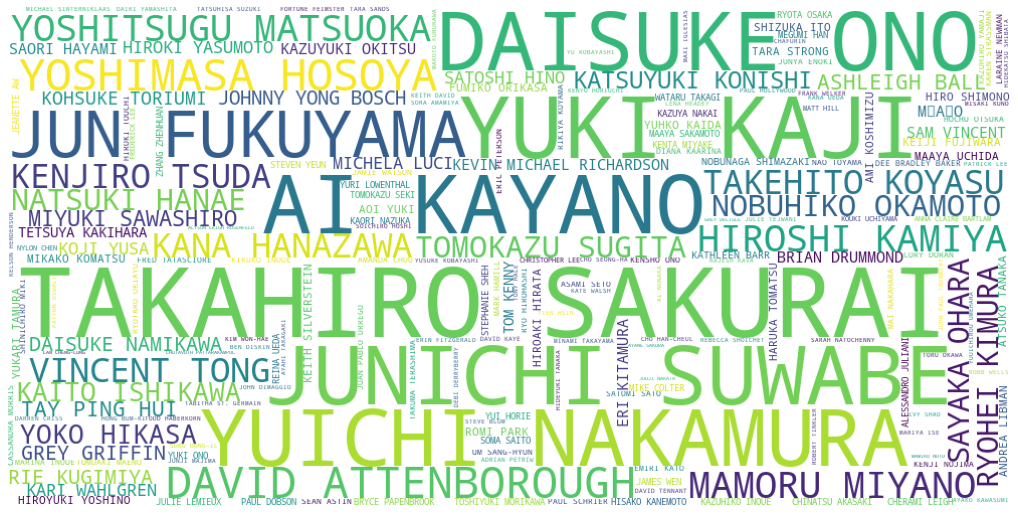

In [ ]:
# Actors with the most number of appearence in a TV Shows
a=[]
for v in movies[movies.type=='TV Show'].cast.dropna():
    words=v.split(',')
    for w in words:
       
            a.append(w.upper().strip())
            
from collections import Counter
word_could_dict=Counter(a)
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

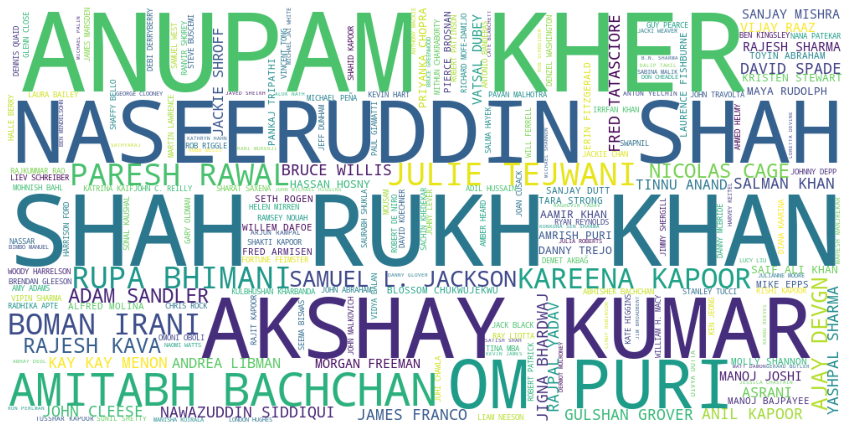

In [ ]:
# Actors with the most number of appearence in a Movie
a=[]
for v in movies[movies.type=='Movie'].cast.dropna():
    words=v.split(',')
    for w in words:
        a.append(w.upper().strip())
        
            
            
from collections import Counter
word_could_dict=Counter(a)
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Number of Movies/Shows released year wise
px.bar(movies['release_year'].value_counts(),title='Number of shows/movies released year wise')

In [ ]:
# Distributions of Rating
px.bar(movies['rating'].value_counts().head(10))

In [ ]:
# Distribution of Duration for movies
px.bar(movies[movies.type=='Movie']['duration'].value_counts().sort_values(ascending=False).head(20))

In [ ]:
# Distribution of number of seasons for TV Shows
px.bar(movies[movies.type=='TV Show']['duration'].value_counts().sort_values(ascending=False).head(12))

In [ ]:
# Wordcloud of Categories of Movies/TV Shows
b=[]
for v in movies.listed_in.dropna():
    words=v.split(',')
    for w in words:
        if w in b:
            continue
        else:
            b.append(w.upper().strip())

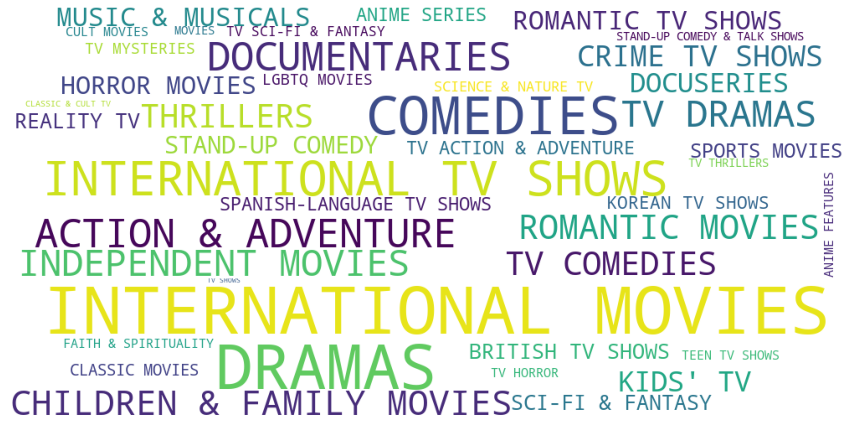

In [ ]:
word_could_dict=Counter(b)
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Country wise analysis
px.bar(movies['country'].value_counts().sort_values(ascending=False).head(15))

In [ ]:
df1=movies[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})   #displaying the total content of each type-movie,tv show every
#year from 2010 to upto this year
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010] #dataframe after 2010
df2

,Release Year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


In [ ]:
#line graph
df1=movies[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on netflix')
fig3.show() #displaying the above data as line chart

In [ ]:
# Top 5 Actors and Directors:
movies['director']=movies['director'].fillna('No Director Specified') #filling na values - missing data
filtered_directors=pd.DataFrame()                                   #converting into a dataframe
filtered_directors=movies['director'].str.split(',',expand=True).stack() #splitting various directors in a same column with ","
filtered_directors=filtered_directors.to_frame()                   #converting into a dataframe
filtered_directors.columns=['Director']                             #changing the name from 0 to director
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)   #directors with highest approval from audience (famous directors)
directorsTop5=directors.head()                #printing top5 directorsw
directorsTop5=directorsTop5.sort_values(by=['Total Content']) #from this df sorting according to content
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')  #visualise the data in the form of bargraph
fig1.show() #printing barplot

In [ ]:
# The top 5 successful actors
movies['cast']=movies['cast'].fillna('No Cast Specified')    #filling the missing values -cleaning data
filtered_cast=pd.DataFrame()          #converting into a dataframe
filtered_cast=movies['cast'].str.split(',',expand=True).stack()    ##splitting various cast in a same column with ","
filtered_cast=filtered_cast.to_frame()          #converting into a dataframe
filtered_cast.columns=['Actor']             #changing the name from 0 to actor
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)        #actors with highest approval from audience (famous directors)
actorsTop5=actors.head()                  #taking head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
actorsTop5         #printing dataframe

,Actor,Total Content
23624,Om Puri,27
15541,Julie Tejwani,28
30303,Takahiro Sakurai,30
26941,Rupa Bhimani,31
2612,Anupam Kher,39


In [ ]:
#line graph
df1=movies[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2000]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on netflix')
fig3.show() #displaying the above data as line chart

In [ ]:
from textblob import TextBlob # for sentiment analysis

In [ ]:
# Sentiment Analysis
# sentiment analysis describes the positive or negative or neutral values of the emotion of writer

dfx=movies[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity   #checking polarity 0,<-1 or>1
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent

dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
dfx=dfx[dfx['Release Year']>=2000]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show() #displaying it as a figure